In [1]:
import torch
import torch.nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import Subset
from torchvision.datasets import ImageFolder
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm as tqdm
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [2]:
print(torch.cuda.is_available())

True


In [2]:
import model

net=model.FFNNs(12000)
print(net)

FFNNs(
  (fc1): Linear(in_features=12000, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=6, bias=True)
)


In [20]:
import pandas as pd
import numpy as np
import os
import csv
from preprocess import preprocess as pre

In [38]:
name = ["nagata", "noda", "shiba", "kirikihira", "asae2"]
name_action = ["nagata_action", "noda_action", "shiba_action", "kirikihira_action", "asae_action"]
name_list = name + name_action
experiment = 'RMS'
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Data = None
Labels = None
DATA_list = []
LABEL_list = []
for name_ in name_list:
    # デスクトップのパス
    path_in = './dataset/{}/'.format(str(name_))
    path_out = './Result/experiment1_{}/'.format(str(name_))

    try:
        os.makedirs(path_out, exist_ok=True)
    except FileExistsError:
        pass
    data = pre(path_in)
    if experiment == 'IEMG':
        Data, Labels = data.iemgdata()
        input_dim = Data.shape[1]

    elif experiment == 'RMS':
        Data, Labels = data.emgdata()
        input_dim = Data.shape[1]
    DATA_list.append(Data)
    LABEL_list.append(Labels)
DATA_list = np.array(DATA_list)
LABEL_list = np.array(LABEL_list)
DATA = np.concatenate([DATA_list[0], DATA_list[1], DATA_list[2], DATA_list[3], DATA_list[4],
                      DATA_list[5], DATA_list[6], DATA_list[7], DATA_list[8], DATA_list[9]])
LABEL = np.concatenate([LABEL_list[0], LABEL_list[1], LABEL_list[2], LABEL_list[3], LABEL_list[4],
                        LABEL_list[5], LABEL_list[6], LABEL_list[7], LABEL_list[8], LABEL_list[9]])


	 前処理時間	0.9815034866333008[s]
	 前処理時間	0.9802696704864502[s]
	 前処理時間	0.9994697570800781[s]
	 前処理時間	0.9462888240814209[s]
	 前処理時間	0.9412484169006348[s]
	 前処理時間	0.9304220676422119[s]
	 前処理時間	0.9367668628692627[s]
	 前処理時間	0.9525501728057861[s]
	 前処理時間	0.9557569026947021[s]
	 前処理時間	0.9698145389556885[s]


In [41]:
DATA.shape

(3000, 12000)

In [29]:
DATA_list=np.concatenate([DATA[0],DATA[1],DATA[2]+DATA[3]+DATA[4]+DATA[5]+DATA[6]+DATA[7]+DATA[8]+DATA[9]])

In [31]:
len(DATA_list)

300

In [28]:
for i in range(10):
    print(len(DATA[i]))

300
300
300
300
300
300
300
300
300
300


In [38]:
name = ["nagata", "noda", "shiba", "kirikihira", "asae2"]
name_action = ["nagata_action", "noda_action", "shiba_action", "kirikihira_action", "asae_action"]
name_list = name + name_action
experiment = 'RMS'

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Data = None
Labels = None
DATA = {}
LABEL = {}
for name_ in name_list:
    # デスクトップのパス
    path_in = './dataset/{}/'.format(str(name_))
    path_out = './Result/experiment1_FNN_{}/{}/'.format(experiment, str(name_))
    
    try:
        os.makedirs(path_out, exist_ok=True)
    except FileExistsError:
        pass
    data = pre(path_in)
    if experiment == 'IEMG':
        Data, Labels = data.iemgdata()
        input_dim = Data.shape[1]

    elif experiment == 'RMS':
        Data, Labels = data.emgdata()
        input_dim = Data.shape[1]
    DATA[name_] = Data
    LABEL[name_] = Labels

	 前処理時間	0.9847238063812256[s]
	 前処理時間	0.9714360237121582[s]
	 前処理時間	1.033653974533081[s]
	 前処理時間	0.9626290798187256[s]
	 前処理時間	0.9671204090118408[s]
	 前処理時間	1.044018268585205[s]
	 前処理時間	0.9540979862213135[s]
	 前処理時間	0.9784908294677734[s]
	 前処理時間	0.9658286571502686[s]
	 前処理時間	0.9721224308013916[s]


In [73]:
np.random.seed(777)
_index = np.arange(len(DATA["nagata"]))
np.random.shuffle(_index)
train_index, validation_index, test_index = np.split(_index, [int(.6*len(DATA["nagata"])), int(.8*len(DATA["nagata"]))])

In [75]:
emg_data_person=torch.tensor(DATA["nagata"], dtype=torch.float32)
emg_data_label=torch.tensor(LABEL["nagata"], dtype=torch.int64)
emg_dataset = torch.utils.data.TensorDataset(emg_data_person, emg_data_label)


In [83]:
LABEL["nagata"][244]

4

In [121]:
np.random.seed(777)
_index = np.arange(len(DATA[name_]))
np.random.shuffle(_index)
train_index, validation_index, test_index = np.split(_index, [int(.6*len(DATA[name_])), int(.8*len(DATA[name_]))])
emg_data_person=torch.tensor(DATA[name_], dtype=torch.float32)
emg_data_label=torch.tensor(LABEL[name_], dtype=torch.int64)
emg_dataset = torch.utils.data.TensorDataset(emg_data_person, emg_data_label)

train_dataset = Subset(emg_dataset, train_index)
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                            batch_size=20, 
                                            shuffle=True, 
                                            num_workers=1)

validation_dataset   = Subset(emg_dataset, validation_index)
val_loader = torch.utils.data.DataLoader(validation_dataset, 
                                            batch_size=20, 
                                            shuffle=False, 
                                            num_workers=1)

test_dataset   = Subset(emg_dataset, test_index)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                            batch_size=20, 
                                            shuffle=False, 
                                            num_workers=1)



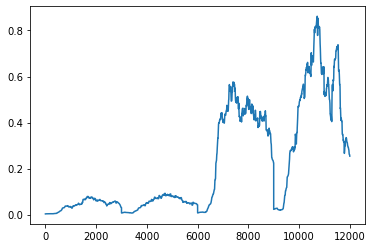

In [115]:
import matplotlib.pyplot as plt 
plt.plot(range(len(train_dataset[0][0])),train_dataset[0][0].numpy())

In [123]:
for i, (images, label) in enumerate(train_loader):
    images, label = images, label
    print(i)
    # バッチサイズ, チャンネル数, 縦, 横
    print(images.size())

    # ラベル
    print(label.size())

0
torch.Size([20, 12000])
torch.Size([20])
1
torch.Size([20, 12000])
torch.Size([20])
2
torch.Size([20, 12000])
torch.Size([20])
3
torch.Size([20, 12000])
torch.Size([20])
4
torch.Size([20, 12000])
torch.Size([20])
5
torch.Size([20, 12000])
torch.Size([20])
6
torch.Size([20, 12000])
torch.Size([20])
7
torch.Size([20, 12000])
torch.Size([20])
8
torch.Size([20, 12000])
torch.Size([20])


In [124]:
for i, (images, label) in enumerate(val_loader):
    images, label = images, label
    print(i)
    # バッチサイズ, チャンネル数, 縦, 横
    print(images.size())

    # ラベル
    print(label.size())

0
torch.Size([20, 12000])
torch.Size([20])
1
torch.Size([20, 12000])
torch.Size([20])
2
torch.Size([20, 12000])
torch.Size([20])


In [125]:
for i, (images, label) in enumerate(test_loader):
    images, label = images, label
    print(i)
    # バッチサイズ, チャンネル数, 縦, 横
    print(images.size())

    # ラベル
    print(label.size())

0
torch.Size([20, 12000])
torch.Size([20])
1
torch.Size([20, 12000])
torch.Size([20])
2
torch.Size([20, 12000])
torch.Size([20])
